In [1]:
import urllib.request
import pandas as pd

In [2]:
gff_files_and_source_urls = {"S_aureus.gff.gz" : "ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/013/425/GCF_000013425.1_ASM1342v1/GCF_000013425.1_ASM1342v1_genomic.gff.gz",
                           "S_typhimurium.gff.gz" : "ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/195/995/GCF_000195995.1_ASM19599v1/GCF_000195995.1_ASM19599v1_genomic.gff.gz",
                           "E_coli.gff.gz":"ftp://ftp.ncbi.nlm.nih.gov/genomes/refseq/bacteria/Escherichia_coli/reference/GCF_000005845.2_ASM584v2/GCF_000005845.2_ASM584v2_genomic.gff.gz"}

In [3]:
for file_name, url in gff_files_and_source_urls.items():
    print(file_name, url)

S_aureus.gff.gz ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/013/425/GCF_000013425.1_ASM1342v1/GCF_000013425.1_ASM1342v1_genomic.gff.gz
S_typhimurium.gff.gz ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/195/995/GCF_000195995.1_ASM19599v1/GCF_000195995.1_ASM19599v1_genomic.gff.gz
E_coli.gff.gz ftp://ftp.ncbi.nlm.nih.gov/genomes/refseq/bacteria/Escherichia_coli/reference/GCF_000005845.2_ASM584v2/GCF_000005845.2_ASM584v2_genomic.gff.gz


In [4]:
# plt.show is needed to display more than one plot
import matplotlib.pyplot as plt
plt.show()

In [28]:
for file_name, url in gff_files_and_source_urls.items():
    print(file_name, url)
    urllib.request.urlretrieve(url, file_name)
    gff_data = pd.read_csv(file_name, sep="\t", comment="#", names=["seqid",
                                                              "source",
                                                              "type",
                                                              "start",
                                                              "end",
                                                              "score",
                                                              "strand",
                                                              "phase",
                                                              "attributes"])
    print(gff_data)

S_aureus.gff.gz ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/013/425/GCF_000013425.1_ASM1342v1/GCF_000013425.1_ASM1342v1_genomic.gff.gz
            seqid  source    type    start      end score strand phase  \
0     NC_007795.1  RefSeq  region        1  2821361     .      +     .   
1     NC_007795.1  RefSeq    gene      517     1878     .      +     .   
2     NC_007795.1  RefSeq     CDS      517     1878     .      +     0   
3     NC_007795.1  RefSeq    gene     2156     3289     .      +     .   
4     NC_007795.1  RefSeq     CDS     2156     3289     .      +     0   
...           ...     ...     ...      ...      ...   ...    ...   ...   
5789  NC_007795.1  RefSeq     CDS  2819018  2820397     .      -     0   
5790  NC_007795.1  RefSeq    gene  2820536  2820889     .      -     .   
5791  NC_007795.1  RefSeq     CDS  2820536  2820889     .      -     0   
5792  NC_007795.1  RefSeq    gene  2821010  2821147     .      -     .   
5793  NC_007795.1  RefSeq     CDS  2821010  2821

In [39]:
for file_name, url in gff_files_and_source_urls.items():
    urllib.request.urlretrieve(url, file_name)
    print(gff_data["type"].value_counts())

gene                      4419
CDS                       4379
repeat_region              697
exon                       180
pseudogene                 166
tRNA                        86
ncRNA                       72
mobile_genetic_element      49
sequence_feature            48
rRNA                        22
region                       1
origin_of_replication        1
recombination_feature        1
Name: type, dtype: int64
gene                      4419
CDS                       4379
repeat_region              697
exon                       180
pseudogene                 166
tRNA                        86
ncRNA                       72
mobile_genetic_element      49
sequence_feature            48
rRNA                        22
region                       1
origin_of_replication        1
recombination_feature        1
Name: type, dtype: int64
gene                      4419
CDS                       4379
repeat_region              697
exon                       180
pseudogene          

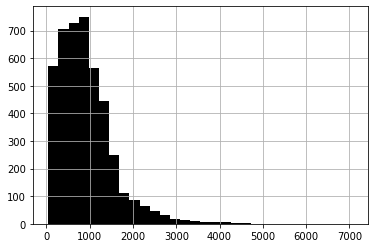

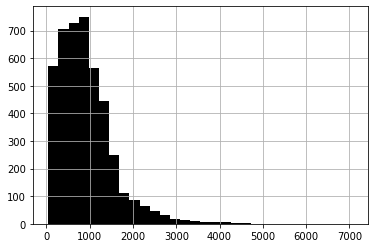

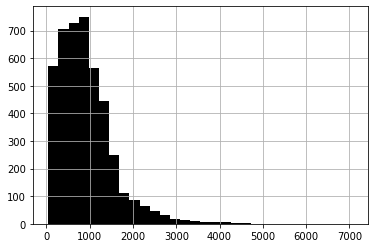

In [42]:
%matplotlib inline
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
for gff_file, source_url in gff_files_and_source_urls.items():
    urllib.request.urlretrieve(source_url, gff_file)
    gff_data = pd.read_csv(file_name, sep="\t", comment="#", names=["seqid",
                                                              "source",
                                                              "type",
                                                              "start",
                                                              "end",
                                                              "score",
                                                              "strand",
                                                              "phase",
                                                              "attributes"])
    gff_data["length"] = gff_data["end"] - gff_data["start"] + 1
    gene_data = gff_data[gff_data["type"] == "gene"]
    gene_data["length"].hist(bins=30, color="black")
    plt.show()